## Under 5 deaths(CM_01) predictor

*Maternal health interventions:*

    Antenatal care coverage - at least one visit (in the two or three years preceding the survey) (%) (anc1)
    Antenatal care coverage - at least four visits (in the two or three years preceding the survey) (%) (anc4)
    Births attended by skilled health personnel (in the two or three years preceding the survey) (%) (sba)

*Newborn and child health interventions:*

Preventive care:

    Early initiation of breastfeeding (%) (bfearly)
    Children aged 6-59 months who received vitamin A supplementation (%) (vita)

Childhood immunization:

    BCG immunization coverage among one-year-olds (%) (vbcg)
    Measles immunization coverage among one-year-olds (%) (vmsl)
    Polio immunization coverage among one-year-olds (%) (vpolio)
    DTP3 immunization coverage among one-year-olds (%) (vdpt)
    Full immunization coverage among one-year-olds (%) (vfull)
   
Care-seeking for sick children:

    Children aged < 5 years with diarrhoea receiving oral rehydration salts (%) (ors)
    Children aged < 5 years with diarrhoea receiving oral rehydration therapy and continued feeding (%) (ort)
    Children aged < 5 years with pneumonia symptoms taken to a health facility (%)



In [1]:
import pandas as pd
import numpy as np

## Preprocess the data

In [2]:
CM_01 = pd.read_csv('Death under 5.csv')

In [3]:
CM_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32211 entries, 0 to 32210
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               32211 non-null  object 
 1   Indicator                   32211 non-null  object 
 2   ValueType                   32211 non-null  object 
 3   ParentLocationCode          32211 non-null  object 
 4   ParentLocation              32211 non-null  object 
 5   Location type               32211 non-null  object 
 6   SpatialDimValueCode         32211 non-null  object 
 7   Location                    32211 non-null  object 
 8   Period type                 32211 non-null  object 
 9   Period                      32211 non-null  int64  
 10  IsLatestYear                32211 non-null  bool   
 11  Dim1 type                   32211 non-null  object 
 12  Dim1                        32211 non-null  object 
 13  Dim1ValueCode               322

In [4]:
# Delete the rows of male and female separate values
indexSex = CM_01[(CM_01['Dim1'] != 'Both sexes')].index
CM_01.drop(indexSex , inplace=True)

In [5]:
# Funtion to drop usless columns
def drop_col(table):
    table.drop(columns=['IndicatorCode', 'Indicator', 'Dim1','ValueType','ParentLocationCode','ParentLocation','Location type','Period type','Language','FactComments', 'FactValueTranslationID', 'FactValueNumericHighPrefix', 'DataSource','FactValueNumericPrefix', 'FactValueUoM', 'FactValueNumericLowPrefix', 'Dim1 type', 'Dim1ValueCode', 'Dim2','Dim2 type', 'Dim2ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'Value', 'DateModified', 'IsLatestYear', 'SpatialDimValueCode', 'FactValueNumericLow', 'FactValueNumericHigh'], axis =1, inplace = True) 
    

In [6]:
# Drop and rename columns in trajet table 
drop_col(CM_01)
CM_01 = CM_01.rename({ 'Location' :'Country', 'Period' :'Year','FactValueNumeric': 'CM_01' }, axis=1)

In [7]:
# Adjust the year of the main indicator (CM_01) to make predictions in the next years of the others indicators data callected
CM_01.Year = CM_01.Year - 1
CM_01.CM_01 = CM_01.CM_01 / 1000

In [8]:
# Read csv for each indicator and add to a list
indicators=[]
indicators_names= []
anc1 = pd.read_csv('Antenatal care coverage - at least one visit (in the two or three years preceding the survey) (%).csv')
indicators.append(anc1)
indicators_names.append('anc1')
anc4 = pd.read_csv('Antenatal care coverage - at least four visits (in the two or three years preceding the survey) (%).csv')
indicators.append(anc4)
indicators_names.append('anc4')
sba = pd.read_csv('Births attended by skilled health personnel (in the two or three years preceding the survey) (%).csv')
indicators.append(sba)
indicators_names.append('sba')
bfearly = pd.read_csv('Early initiation of breastfeeding.csv')
indicators.append(bfearly)
indicators_names.append('bfearly')
vita = pd.read_csv('Vitamin A suplementation.csv')
indicators.append(vita)
indicators_names.append('vita')
vbcg = pd.read_csv('BCG immunization coverage among one-year-olds.csv')
indicators.append(vbcg)
indicators_names.append('vbcg')
vmsl = pd.read_csv('Measles immunization coverage among one-year.csv')
indicators.append(vmsl)
indicators_names.append('vmsl')
vpolio = pd.read_csv('Polio immunization coverage among one-year-olds.csv')
indicators.append(vpolio)
indicators_names.append('vpolio')
vdpt = pd.read_csv('DTP3 immunization coverage among one-year-olds (%).csv')
indicators.append(vdpt)
indicators_names.append('vdpt')
vfull = pd.read_csv('Full immunization coverage among one-year-olds (%).csv')
indicators.append(vfull)
indicators_names.append('vfull')
ors = pd.read_csv('Children aged  5 years with diarrhoea receiving oral rehydration salts (%).csv')
indicators.append(ors)
indicators_names.append('ors')
ort = pd.read_csv('Children aged  5 years with diarrhoea receiving oral rehydration therapy and continued feeding (%).csv')
indicators.append(ort)
indicators_names.append('ort')
carep = pd.read_csv('Children aged  5 years with pneumonia symptoms taken to a health facility (%).csv')
indicators.append(carep)
indicators_names.append('carep')

In [9]:
# Deleting usless columns and changes names in indicators. Merge the table of each indicator with the main indicator CM_01, using the average value of both age subgroups (15-19 and 20-49.
position = 0
unify = CM_01
for i in indicators:
    drop_col(i)
    i.columns = ['Country', 'Year', indicators_names[position]]
    unify =  pd.merge(unify, i, on=["Country", "Year"])
    position += 1
unify = unify.groupby(['Country','Year'], as_index=False).mean()

In [10]:
unify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  431 non-null    object 
 1   Year     431 non-null    int64  
 2   CM_01    431 non-null    float64
 3   anc1     358 non-null    float64
 4   anc4     358 non-null    float64
 5   sba      358 non-null    float64
 6   bfearly  369 non-null    float64
 7   vita     180 non-null    float64
 8   vbcg     265 non-null    float64
 9   vmsl     265 non-null    float64
 10  vpolio   265 non-null    float64
 11  vdpt     265 non-null    float64
 12  vfull    265 non-null    float64
 13  ors      262 non-null    float64
 14  ort      248 non-null    float64
 15  carep    139 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 54.0+ KB


In [11]:
# Delete rows eith empy values
df = unify.dropna().reset_index(drop=True)

In [12]:
# Now the data of the years and contries maches, so this data is no longuer useful
df.drop(columns = ['Country','Year'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CM_01    130 non-null    float64
 1   anc1     130 non-null    float64
 2   anc4     130 non-null    float64
 3   sba      130 non-null    float64
 4   bfearly  130 non-null    float64
 5   vita     130 non-null    float64
 6   vbcg     130 non-null    float64
 7   vmsl     130 non-null    float64
 8   vpolio   130 non-null    float64
 9   vdpt     130 non-null    float64
 10  vfull    130 non-null    float64
 11  ors      130 non-null    float64
 12  ort      130 non-null    float64
 13  carep    130 non-null    float64
dtypes: float64(14)
memory usage: 14.3 KB


# Create the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
df.head()

,CM_01,anc1,anc4,sba,bfearly,vita,vbcg,vmsl,vpolio,vdpt,vfull,ors,ort,carep
0,79.812,58.795,17.145,53.960,41.690,45.775,74.670,55.275,62.375,57.035,38.670,42.445,38.365,54.660
1,98.196,81.150,58.605,50.375,48.600,8.215,71.425,51.460,40.410,38.535,28.245,40.755,36.305,55.475
2,6.448,77.755,45.090,91.170,27.530,6.390,81.520,63.260,72.680,71.270,50.270,21.620,32.220,30.820
3,176.003,54.120,22.170,20.665,42.920,80.910,96.885,82.570,90.595,90.610,81.205,77.360,67.635,36.195
4,136.388,55.300,25.855,31.835,46.075,58.805,97.690,87.300,92.100,92.390,85.325,76.935,73.450,37.420


In [ ]:
# Prepare the data for the models
X = df.drop(['CM_01'], axis = 1)
y = pd.Series(df.CM_01)
dummy = DummyRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )


In [ ]:
# Create the Neuronal Network
n_cols = X.shape[1]
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(1))

In [ ]:
my_optimizer=Adam(0.001)
model.compile(optimizer=my_optimizer, loss='mean_squared_error')


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              14000     
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_11 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 2,017,001
Trainable params: 2,017,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the models
dummy.fit(X_train , y_train)
model.fit(X_train, y_train)

4/4 [==============================] - 1s 28ms/step - loss: 68451.3281


In [ ]:
# Predict the value of the test samples
y_dummy_pred = dummy.predict(X_test)
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 60ms/step


In [ ]:
#Evaluate the models
mae_dummy = mean_absolute_error(y_dummy_pred,y_test)
print( 'mae_dummy = ',mae_dummy)

mae_model = mean_absolute_error(y_pred,y_test)
print('mae_model = ',mae_model)


mae_dummy =  103.3040399408284
mae_model =  65.60220485687256


# Use the model

In [ ]:
import requests

from bs4 import BeautifulSoup

import lxml

from statistics import mean

#### List of countries

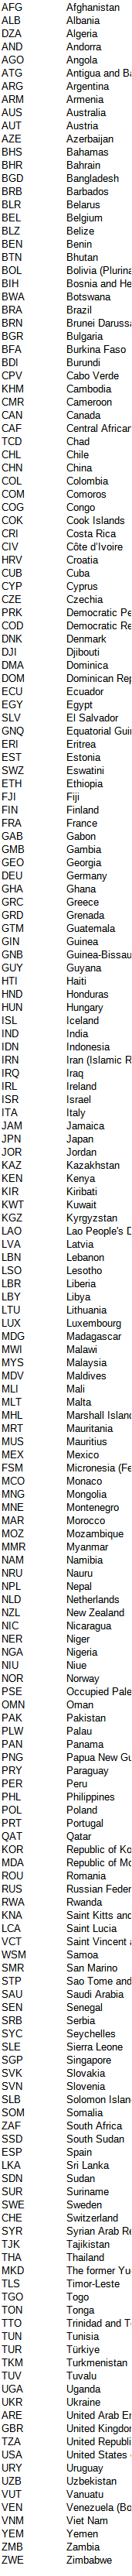

In [ ]:
country = input('Country id:' )

year = int(input('Year:' ))

In [ ]:
# Funtion to obtain the indicator's data of country and year requested using WHO API
def indicator_value(indicator):
    url = f'http://apps.who.int/gho/athena/api/GHO/{indicator}?filter=COUNTRY:{country};YEAR:{year}'

    payload={}
    headers = {
      'Cookie': '__cfruid=e40cdf9f678c428b8fa25d00bd7d9d1228e6a84c-1671007491; TS012842ba=015dd60f3ede71b35db2c4052fb9c8d245b291293986371d7e475739811c20b1418095cd786bff89f227ec9dfe5da3b1aa36b639ad; TS01a71ea7=015dd60f3ede71b35db2c4052fb9c8d245b291293986371d7e475739811c20b1418095cd786bff89f227ec9dfe5da3b1aa36b639ad; TS01b735ab=015dd60f3eb5d81715a168bf63129f32a589d5c7da2878d9c7892e4bcebdd943aad6a974d17c5088c7e3082ec4631f78344c5ab388'
    }

    response = requests.request("GET", url, headers=headers, data=payload)

    doc = BeautifulSoup(response.text, "lxml")

    obs = doc.find_all('dim', category='AGEGROUP')
    ind_values = []
    for i in obs:
      father = i.parent
      string= father.display.string
      value = string[0:4]
      # Try to convert the string to a float
      try:
      # Convert the string to a float and add it to the list
        ind_values.append(float(value))
      except ValueError:
      # If the string cannot be converted to a float, do nothing
        pass
    try:
      ind_value = (mean(ind_values))
    except ValueError:
      ind_value = ''                         
    return ind_value
    

In [ ]:
# Save and organize the data
indicators_list= ['anc1','anc4','sba', 'bfearly','vita','vbcg','vmsl','vpolio','vdpt','vfull','ors','ort','carep']
indicators_values = {}
for ind in indicators_list:
    indicators_values[ind]=(indicator_value(ind))
print(indicators_values)

df_values = pd.DataFrame(indicators_values, columns=indicators_list, index = [0])
print(df_values) 


c:\Users\Guillermo Tarrasó\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


{'anc1': 97.15, 'anc4': 93.65, 'sba': 94.9, 'bfearly': 50.9, 'vita': 4.1, 'vbcg': 93.2, 'vmsl': 81.94999999999999, 'vpolio': 80.2, 'vdpt': 77.85, 'vfull': 66.75, 'ors': 15.25, 'ort': 37.25, 'carep': 58.8}
    anc1   anc4   sba  bfearly  vita  vbcg   vmsl  vpolio   vdpt  vfull  \
0  97.15  93.65  94.9     50.9   4.1  93.2  81.95    80.2  77.85  66.75   

     ors    ort  carep  
0  15.25  37.25   58.8  


In [ ]:
# Check if any of the columns have an empty value and give the result
if df_values.eq('').any().any():
    print('One or more columns have an empty value')
else:
    deaths_under_5 = model.predict(df_values)
    print(f'The predicted Under-five mortality rate (probability of dying by age 5 per 1000 live births) in {country} for {year+1} is : {deaths_under_5}')

The predicted Under-five mortality rate (probability of dying by age 5 per 1000 live births) in per for 2021 is : [3.377292]
